### 円山動物園　入園者数オープンデータ

https://ckan.pf-sapporo.jp/dataset/sapporo_maruyama_zoo_visitors

In [1]:
import os
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
data_path = "data/"

df_list = []
for f in os.listdir(data_path):
    print(f)
    df = pd.read_csv(os.path.join(data_path, f), encoding='utf-8')
    df_list.append(df)
    
df = pd.concat(df_list, axis='index', sort=False)
# df = df.dropna(how='all').fillna(0) # 前処理済みのファイルの場合は不要な処理

2011040120180831.csv
2018090120180930.csv
2018100120181031.csv
2018110120181130.csv
2018120120181231.csv
2019010120190131.csv
2019020120190228.csv
2019030120190331.csv
2019040120190430.csv
2019050120190531.csv
2019060120190630.csv
2019070120190731.csv


In [4]:
df.dtypes

日付               object
A:総入園者数           int64
B:有料入園者数          int64
C:無料入園者数          int64
D:Cのうち幼児          int64
E:Cのうち小学生         int64
F:Cのうち中学生         int64
G:Cのうち障がい者        int64
H:Cのうち市内６５歳以上     int64
I:CのうちD〜H以外       int64
dtype: object

In [5]:
# インデックスを datetimeに変更
df['date'] = pd.to_datetime(df['日付'])
df.set_index('date', inplace=True)

In [6]:
# 年，月，曜日，年度の列を追加
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday # 曜日
df['FY'] = df['Year'].where(df['Month']>=4, df['Year']-1) # 年度

In [7]:
import matplotlib.font_manager as fm
fp11 = fm.FontProperties(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', size=11)
fp = fm.FontProperties(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', size=14)

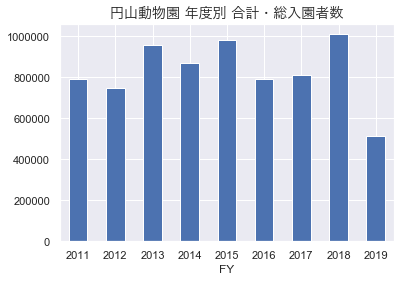

In [8]:
ax = df.groupby('FY')['A:総入園者数'].sum().plot.bar()

ax.set_title("円山動物園 年度別 合計・総入園者数", fontproperties=fp)
plt.xticks(rotation=0) 
plt.show()

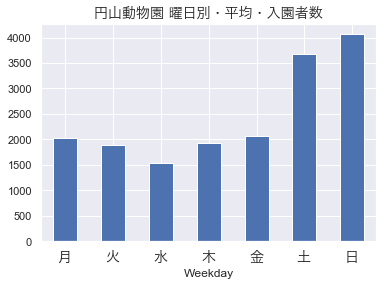

In [9]:
ax = df.groupby('Weekday')['A:総入園者数'].mean().plot.bar()

ax.set_title("円山動物園 曜日別・平均・入園者数", fontproperties=fp)
ax.set_xticklabels(['月','火','水','木','金','土','日'], fontproperties=fp)
plt.xticks(rotation=0) 
plt.show()

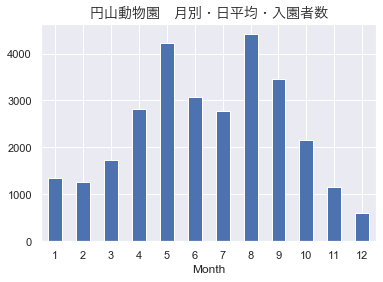

In [10]:
ax = df.groupby('Month')['A:総入園者数'].mean().plot.bar()

ax.set_title("円山動物園　月別・日平均・入園者数", fontproperties=fp)
plt.xticks(rotation=0) 
plt.show()

### 年度別　入園者数のプロット

In [11]:
from datetime import datetime
import matplotlib.dates as mdates

In [12]:
df_2011 = df.loc[datetime(2011,4,1):datetime(2011,7,31), ['B:有料入園者数', 'C:無料入園者数', 'Weekday']]
df_2018 = df.loc[datetime(2018,4,1):datetime(2018,7,31), ['B:有料入園者数', 'C:無料入園者数', 'Weekday']]
df_2019 = df.loc[datetime(2019,4,1):datetime(2019,7,31), ['B:有料入園者数', 'C:無料入園者数', 'Weekday']]

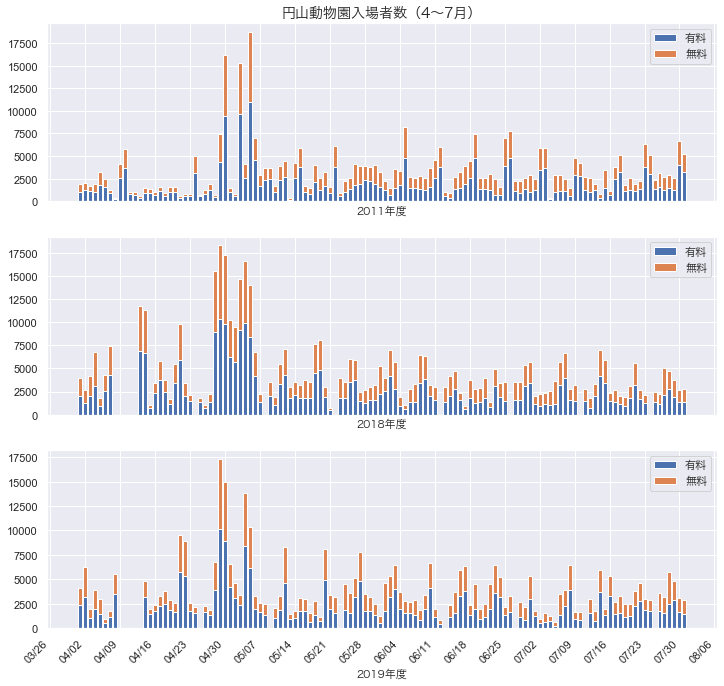

In [13]:
fig,axes = plt.subplots(3,1, figsize=(12,12))
fig.subplots_adjust(hspace=0.20, top=0.90, bottom=0.20)
fig.autofmt_xdate(rotation=45)

def plot(ax, df, fy):
    x = df.index
    y0 = df['B:有料入園者数'].values
    y1 = df['C:無料入園者数'].values

    bh0 = ax.bar(x, y0)
    bh1 = ax.bar(x, y1, bottom=y0)

    ax.xaxis.set_major_locator( mdates.DayLocator(interval=7) )
    ax.xaxis.set_major_formatter( mdates.DateFormatter("%m/%d") )

    ax.set_xlabel('{}年度'.format(fy),fontproperties=fp11)
    ax.legend(handles=[bh0,bh1], labels=['有料','無料'], prop=fp11)

plot(axes[0], df_2011, 2011)
plot(axes[1], df_2019, 2018)
plot(axes[2], df_2018, 2019)

axes[0].set_title("円山動物園入場者数（4〜7月）",fontproperties=fp)

plt.show()